# EECS16B Homework 10: Speeding Up OMP

This example generates a sparse signal and tries to recover it using the Orthogonal Matching Pursuit algorithm.

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
import imageio
from IPython import display
from simulator import *
import time
%matplotlib inline

### Part a)

In [2]:
# OMP algorithm
# THERE ARE MISSING LINES THAT YOU NEED TO FILL
def OMP(imDims, sparsity, measurements, A):
    r = measurements.copy()
    indices = []
    
    # Threshold to check error. If error is below this value, stop.
    THRESHOLD = 0.1
    
    # For iterating to recover all signal
    i = 0
    
    while i < sparsity and np.linalg.norm(r) > THRESHOLD: 
        # Calculate the correlations
        print('%d - '%i,end="",flush=True)
        corrs = A.T.dot(r)

        # Choose highest-correlated pixel location and add to collection
        # COMPLETE THE LINE BELOW
        best_index = np.argmax(np.abs(corrs))
        indices.append(best_index)

        # Build the matrix made up of selected indices so far
        # COMPLETE THE LINE BELOW
        Atrunc = A[:,indices]

        # Find orthogonal projection of measurements to subspace
        # spanned by recovered codewords
        b = measurements
        # COMPLETE THE LINE BELOW
        xhat = np.linalg.lstsq(Atrunc, b)[0]  

        # Find component orthogonal to subspace to use for next measurement
        # COMPLETE THE LINE BELOW
        r = b - Atrunc.dot(xhat)

        # This is for viewing the recovery process
        if i % 10 == 0 or i == sparsity-1 or np.linalg.norm(r) <= THRESHOLD:
            recovered_signal = np.zeros(numPixels)
            for j, x in zip(indices, xhat):
                recovered_signal[j] = x
            Ihat = recovered_signal.reshape(imDims)
            plt.title('estimated image')
            plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
            display.clear_output(wait=True)
            display.display(plt.gcf())
        
        i = i + 1
        
    display.clear_output(wait=True)

    # Fill in the recovered signal
    recovered_signal = np.zeros(numPixels)
    for i, x in zip(indices, xhat):
        recovered_signal[i] = x
    
    return recovered_signal

In [3]:
# the setting

# file name for the sparse image
fname = 'speedup_figures/smiley.png'
# number of measurements to be taken from the sparse image
numMeasurements = 6500
# the sparsity of the image
sparsity = 400

# read the image in black and white
I = imageio.imread(fname, as_gray=1)
# normalize the image to be between 0 and 1
I = I/np.max(I)

# shape of the image
imageShape = I.shape
# number of pixels in the image
numPixels = I.size

In [4]:
# generate your image masks and the underlying measurement matrix
Mask, A = randMasks(numMeasurements,numPixels)
# vectorize your image
full_signal = I.reshape((numPixels,1))
# get the measurements
measurements = np.dot(Mask,full_signal)
# remove the mean from your measurements
measurements = measurements - np.mean(measurements)

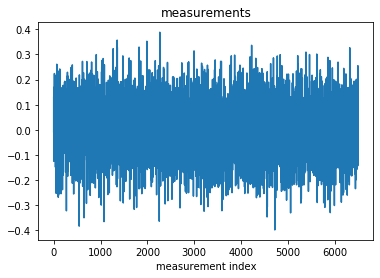

In [5]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

Time taken:  6.390949010848999


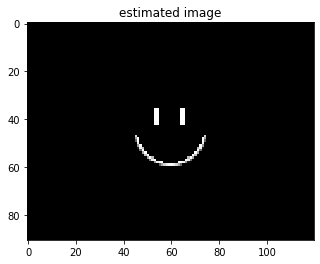

In [6]:
start_time = time.time()
rec = OMP(imageShape, sparsity, measurements, A)
print("Time taken: ", time.time() - start_time)

### Part b)

(100, 100)


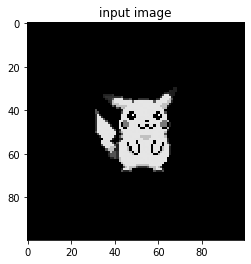

In [7]:
# the setting

# file name for the sparse image
fname = 'speedup_figures/pika.png'
# number of measurements to be taken from the sparse image
numMeasurements = 9000
# the sparsity of the image
sparsity = 800

# read the image in black and white
I = imageio.imread(fname, as_gray=1)
# normalize the image to be between 0 and 1
I = I/np.max(I)

# shape of the image
imageShape = I.shape
print(imageShape)
# number of pixels in the image
numPixels = I.size

plt.title('input image')
plt.imshow(I, cmap=plt.cm.gray, interpolation='nearest');

In [8]:
# generate your image masks and the underlying measurement matrix
Mask, A = randMasks(numMeasurements,numPixels)
# vectorize your image
full_signal = I.reshape((numPixels,1))
# get the measurements
measurements = np.dot(Mask,full_signal)
# remove the mean from your measurements
measurements = measurements - np.mean(measurements)

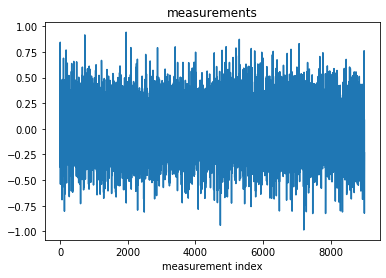

In [9]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

Time taken:  261.7354989051819


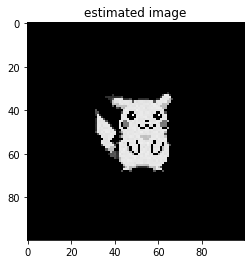

In [10]:
start_time = time.time()
rec = OMP(imageShape, sparsity, measurements, A)
print("Time taken: ", time.time() - start_time)

### Part c)

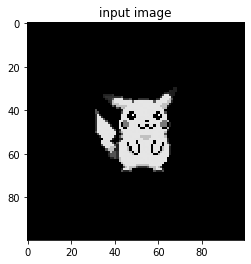

In [11]:
# the setting

# file name for the sparse image
fname = 'speedup_figures/pika.png'
# number of measurements to be taken from the sparse image
numMeasurements = 9000
# the sparsity of the image
sparsity = 800

# read the image in black and white
I = imageio.imread(fname, as_gray=1)
# normalize the image to be between 0 and 1
I = I/np.max(I)

# shape of the image
imageShape = I.shape
# number of pixels in the image
numPixels = I.size

plt.title('input image')
plt.imshow(I, cmap=plt.cm.gray, interpolation='nearest');

In [12]:
# generate your image masks and the underlying measurement matrix
Mask, A = randMasks(numMeasurements,numPixels)
# vectorize your image
full_signal = I.reshape((numPixels,1))
# get the measurements
measurements = np.dot(Mask,full_signal)
# remove the mean from your measurements
measurements = measurements - np.mean(measurements)

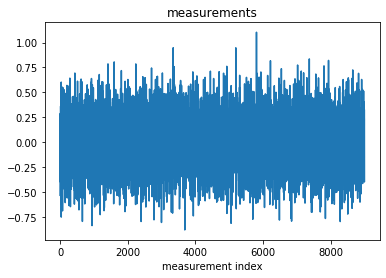

In [13]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

In [14]:
# Write a function that returns a matrix U whose columns form
# an orthonormal basis for the columns of the matrix A.
def gramschmidt(A):
    # Easy way to do this
    # Q, R = np.linalg.qr(A)
    # return Q

    U = np.zeros(A.shape)
    U[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])
    for i in range(1, A.shape[1]):
        a_i = A[:, i]
        for j in range(i, -1, -1):
            a_i = a_i - np.dot(U[j], a_i) / np.dot(U[j], U[j]) * a_i
        U[:, i] = a_i / np.linalg.norm(a_i)
    return U

# A better option is to write a function that takes in a matrix U0
# with orthonormal columns and a single new vector v and adds another
# orthonormal column to U0 creating a new matrix U whose columns are orthonormal
# and span the column space of {U0, v}.
# Note: Using this function will make your code faster.
def gramschmidt_addone(U0, v):
    for i in range(U0.shape[1]):
        v = v - np.dot(U0[:, i], v) / np.dot(U0[:, i], U0[:, i]) * U0[:, i]
    U = np.column_stack((U0, v / np.linalg.norm(v)))
    return U

In [15]:
# THERE ARE MISSING LINES THAT YOU NEED TO FILL
def OMP(imDims, sparsity, measurements, A):
    r = measurements.copy()
    indices = []
    
    # Threshold to check error. If error is below this value, stop.
    THRESHOLD = 0.1
    
    # For iterating to recover all signal
    i = 0
    
    ########################################
    ### THIS LINE INITIALIZES THE MATRIX U
    U = np.zeros([np.size(A, 0), 0])
    ########################################
    proj = np.zeros((A.shape[0], 1))
    
    while i < sparsity and np.linalg.norm(r) > THRESHOLD: 
        # calculate the correlations
        print('%d - '%i,end="",flush=True)
        corrs = A.T.dot(r)

        # Choose highest-correlated pixel location and add to collection
        # COMPLETE THE LINE BELOW
        best_index = np.argmax(np.abs(corrs))
        
        ###########################
        ### MODIFY THIS SECTION ###
        ## TO USE GRAM-SCHMIDT  ###
        ###########################
                
        indices.append(best_index)
        
        # Build the matrix made up of selected indices so far
        # COMPLETE THE LINE BELOW
        Atrunc = A[:, indices]
        
        #############################
        ## CHOOSE ONE OF THESE LINES
        # U = gramschmidt(Atrunc)
        ### OR
        v = A[:, best_index]
        U = gramschmidt_addone(U, v)
        #############################
        
        # Find orthogonal projection of measurements to subspace
        # spanned by recovered codewords
        b = measurements
        
        ###################################
        ## COMPLETE THE LINES BELOW AND
        ## REWRITE THESE LINES USING GRAMSCHMIDT TO SPEED UP LEAST SQUARES
        proj = proj + np.dot(U[:, -1], b) * U[:, -1].reshape((U.shape[0], 1))
        ####################################
        
        # Find component orthogonal to subspace to use for next measurement
        ## CHANGE THIS LINE 
        r = b - proj
        
        ###########################
        ### ------------------- ###
        ###########################
        
        # This is for viewing the recovery process
        if i % 100 == 0 or i == sparsity-1 or np.linalg.norm(r) <= THRESHOLD:
            
            # RECOVERING xhat for plotting
            xhat = np.dot(np.linalg.inv(np.dot(Atrunc.T,Atrunc)),np.dot(Atrunc.T,b-r))
            
            recovered_signal = np.zeros(numPixels)
            for j, x in zip(indices, xhat):
                recovered_signal[j] = x
            Ihat = recovered_signal.reshape(imDims)
            plt.title('estimated image')
            plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
            display.clear_output(wait=True)
            display.display(plt.gcf())
        
        i = i + 1
        
    display.clear_output(wait=True)

    # Fill in the recovered signal
    recovered_signal = np.zeros(numPixels)
    for i, x in zip(indices, xhat):
        recovered_signal[i] = x
    
    return recovered_signal

Time taken:  157.3458480834961


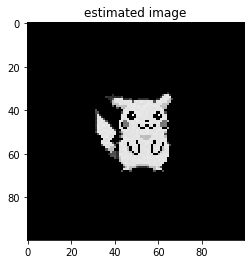

In [16]:
start_time = time.time()
rec = OMP(imageShape, sparsity, measurements, A)
print("Time taken: ", time.time() - start_time)

### Part d)

In [19]:
# OMP with Gram Schmidt Orthogonalization and Batch Hunting
def OMP_GS_Batch(imDims, sparsity, measurements, A):
    r = measurements.copy()
    r = r.reshape(len(measurements))
    
    indices = []
    bases = []
    projection = np.zeros(len(measurements))
    
    # Threshold to check error. If error is below this value, stop.
    THRESHOLD = 0.1
    
    # For iterating to recover all signal
    i = 0
    round = 0
    num_found = 0
    
    b = r.copy()
    
    statusfig = plt.figure(1)
    finalfig = plt.figure(2)
    plt.figure(1)
    
    while i < sparsity and np.linalg.norm(r) > THRESHOLD: 
        # Calculate the correlations
        print('%d : '%round,end="")
        print('%d sigs found : '%num_found,end="",flush=True)
        corrs = A.T.dot(r)
        abscorrs = np.abs(corrs)
        sortedindices = abscorrs.argsort()
        sortedindices = sortedindices[::-1]

        # Choose highest-correlated pixel location and add to collection
        # best_index = np.argmax(np.abs(corrs))
        # best_index = sortedindices[0]
        # indices.append(best_index)
        
        # Initialize the number of things found in this stage to 0
        num_found = 0
        stage_energy = 0
        while i < sparsity and abscorrs[sortedindices[num_found]] > (np.sqrt(stage_energy)*np.sqrt(6*np.log(numPixels))/np.sqrt(numMeasurements)):
            best_index = sortedindices[num_found]
            stage_energy = stage_energy + (abscorrs[best_index])**2
            num_found = num_found + 1
            indices.append(best_index)
             # Gram-Schmidt Method
            if i==0:
                bases = A[:,best_index]/np.linalg.norm(A[:,best_index],2)
            else:
                bases = Gram_Schmidt_rec(bases,A[:,best_index])
             
            if i == 0:
                newsubspace = bases
            else:
                newsubspace = bases[:,i]
        
            projection = projection + (newsubspace.T.dot(b))*newsubspace
        
            # Find component parallel to subspace to use for next measurement
            r = b - projection
            i = i + 1
        # print('%d sigs found - '%num_found,end="",flush=True)        
        if i % 1 == 0 or i == sparsity-1 or np.linalg.norm(r) <= THRESHOLD:
            # xhat = np.linalg.lstsq(Atrunc, b)[0]  
            recovered_signal = np.zeros(numPixels)
            for j in indices:
                recovered_signal[j] = 1
            Ihat = recovered_signal.reshape(imDims)
            plt.title('%d pixels found'%i)
            plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
            display.clear_output(wait=True)
            display.display(plt.gcf())
        
        round = round + 1 # End this while and go hunting again
    # Show what we finally found
    Atrunc = A[:,indices]
    xhat = np.linalg.lstsq(Atrunc, b, rcond=None)[0]
    recovered_signal = np.zeros(numPixels)
    for j, x in zip(indices, xhat):
        recovered_signal[j] = x
    Ihat = recovered_signal.reshape(imDims)
    plt.close()
    plt.clf()
    plt.figure(2)
    plt.title('final estimated image')
    plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest')    
    return recovered_signal

def cheap_o_least_squares(A, b):
    return (A.T).dot(b)

def Gram_Schmidt_rec(orthonormal_vectors,new_vector):
    if len(orthonormal_vectors) == 0:
        new_orthonormal_vectors = new_vector/np.linalg.norm(new_vector,2)
    else:
        if len(orthonormal_vectors.shape) == 1:
            ortho_vector = new_vector - orthonormal_vectors.dot(orthonormal_vectors.T.dot(new_vector))
        else:
             ortho_vector = new_vector - orthonormal_vectors.dot(cheap_o_least_squares(orthonormal_vectors,new_vector))
        normalized = ortho_vector/np.linalg.norm(ortho_vector,2)
        new_orthonormal_vectors = np.column_stack((orthonormal_vectors,normalized))
        
    return new_orthonormal_vectors

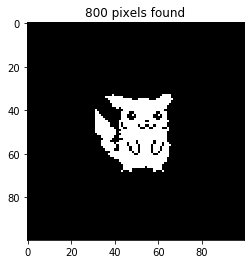

Time taken:  19.04725694656372


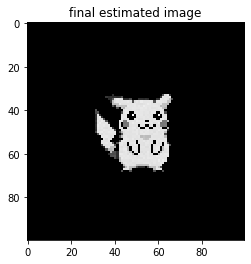

In [20]:
start_time = time.time()
rec2 = OMP_GS_Batch(imageShape, sparsity, measurements, A)
print("Time taken: ", time.time() - start_time)